<a href="https://colab.research.google.com/github/yma3/Path-of-Exile-Currency-Prediction/blob/master/POE_League_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from datetime import datetime
import pandas as pd
import json

import tensorflow as tf
print(tf.__version__)
import numpy as np
from sklearn.preprocessing import normalize, MinMaxScaler

import matplotlib.pyplot as plt

2.3.0


In [3]:
dir = '/content/drive/My Drive/ColabData/POEData/'
os.listdir(dir)

['Metamorph.2019-12-13.2020-03-09.currency.csv',
 'Metamorph.2019-12-13.2020-03-09.items.csv',
 'Blight.2019-09-06.2019-12-09.currency.csv',
 'Blight.2019-09-06.2019-12-09.items.csv',
 'Legion.2019-06-07.2019-09-02.currency.csv',
 'Legion.2019-06-07.2019-09-02.items.csv',
 'Synthesis.2019-03-08.2019-06-04.currency.csv',
 'Synthesis.2019-03-08.2019-06-04.items.csv',
 'Betrayal.2018-12-07.2019-03-05.items.csv',
 'Betrayal.2018-12-07.2019-03-05.currency.csv',
 'Delve.2018-08-31.2018-12-03.currency.csv',
 'Delve.2018-08-31.2018-12-03.items.csv',
 'Incursion.2018-06-01.2018-08-28.items.csv',
 'Incursion.2018-06-01.2018-08-28.currency.csv',
 'Delirium.2020-03-13.2020-06-15.items.csv',
 'Delirium.2020-03-13.2020-06-15.currency.csv',
 'exalteddf.csv',
 'exaltedorbmodel.h5',
 'divinedf.csv',
 'items.json',
 'allitems.csv']

In [4]:
TRACKED_ITEMS = {'exalted':'exalteddf.csv', 
                 'divine':'divinedf.csv',
                 'allitems':'allitems.csv'}

dfs = {}

for key, value in TRACKED_ITEMS.items():
  dfs[key] = pd.read_csv(dir+value)

In [182]:
# exdf = exdf[exdf['League'] == 'Betrayal']
# dfs['exalted']

In [183]:
# exdf.head()
# exdf[exdf['League']=='Delirium']

In [231]:
# print(len(dfs))
# divinedf.head()
# divinedf[divinedf['League']=='Delirium']

3


In [5]:
START_DATE = '2018-12-07'
START_DATE = datetime.strptime(START_DATE, '%Y-%m-%d')

for key, df in dfs.items():
  
  df['Date'] = pd.to_datetime(df['Date'])
  df['Day_Diff'] = (df['Date'] - START_DATE).dt.days
  dfs[key] = df[df['Day_Diff'] >= 0]




# exdf['Date'] = pd.to_datetime(exdf['Date'])
# divinedf['Date'] = pd.to_datetime(divinedf['Date'])

# exdf['Date'] = exdf['Date'].values.astype(int)
# START_DATE = datetime.strptime(START_DATE, '%Y-%m-%d')

# exdf['Day_Diff'] = (exdf['Date'] - START_DATE).dt.days
# divinedf['Day_Diff'] = (divinedf['Date'] - START_DATE).dt.days

# exdf = exdf[exdf['Day_Diff'] >= 0]
# divinedf = divinedf[divinedf['Day_Diff'] >= 0]

In [10]:

exdf = dfs['exalted']
divinedf = dfs['divine']
allitemsdf = dfs['allitems']

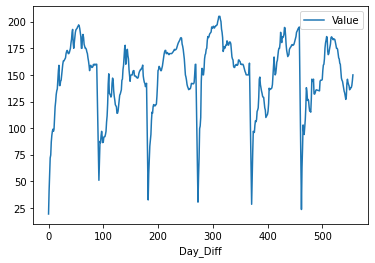

In [11]:
exdf
exdf.plot.line('Day_Diff','Value')

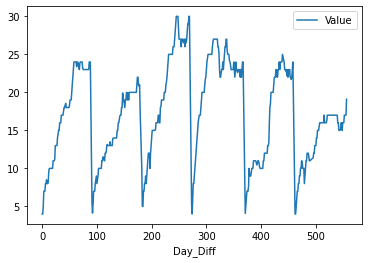

In [12]:
divinedf = dfs['divine']
divinedf.plot.line('Day_Diff','Value')

In [13]:
print(exdf.count())
print(divinedf.count())
print(allitemsdf.count())

Unnamed: 0    538
League        538
Date          538
Get           538
Pay           538
Value         538
Confidence    538
Day_Diff      538
dtype: int64
Unnamed: 0    539
League        539
Date          539
Get           539
Pay           539
Value         539
Confidence    539
Day_Diff      539
dtype: int64
Unnamed: 0    7206
League        7206
Date          7206
Id            7206
Type          7206
Name          7206
BaseType         0
Variant          0
Links            0
Value         7206
Confidence    7206
Day_Diff      7206
dtype: int64


In [240]:
dfs['allitems'].head()

,Unnamed: 0,League,Date,Id,Type,Name,BaseType,Variant,Links,Value,Confidence,Day_Diff
1914,42096,Betrayal,2018-12-07,18978,DivinationCard,The Nurse,NaN,NaN,NaN,74.00000,Low,0
1915,42097,Betrayal,2018-12-08,18978,DivinationCard,The Nurse,NaN,NaN,NaN,16.00000,High,1
1916,42098,Betrayal,2018-12-09,18978,DivinationCard,The Nurse,NaN,NaN,NaN,24.00000,High,2
1917,42099,Betrayal,2018-12-10,18978,DivinationCard,The Nurse,NaN,NaN,NaN,37.34633,High,3
1918,42100,Betrayal,2018-12-11,18978,DivinationCard,The Nurse,NaN,NaN,NaN,40.00000,High,4


In [14]:
with open(dir+'items.json') as f:
  ITEMS = json.load(f)

In [15]:
print(ITEMS.keys())

dict_keys(['nurse', 'doctor', '7yrs', 'immortal', 'homirrors', 'bard', 'atzmirror', '6linkproph', 'ambushproph', 'twiceench', '10ex', '3ex', '2ex', '1ex'])


In [16]:
time = {}
series = {}

# Currencies
time['exalted'] = exdf['Day_Diff'].values
series['exalted'] = exdf['Value'].values
time['divine'] = divinedf['Day_Diff'].values
series['divine'] = divinedf['Value'].values

# Items
for key, itemname in ITEMS.items():
  itemdf = dfs['allitems']
  time[key] = itemdf[itemdf['Name']==itemname]['Day_Diff'].values
  series[key] = itemdf[itemdf['Name']==itemname]['Value'].values


In [17]:
len(time.keys())

16

In [18]:
for key, times in time.items():
  print(key + ' : ' + str(time[key].shape))
  print(key + ' : ' + str(series[key].shape))

exalted : (538,)
exalted : (538,)
divine : (539,)
divine : (539,)
nurse : (537,)
nurse : (537,)
doctor : (533,)
doctor : (533,)
7yrs : (446,)
7yrs : (446,)
immortal : (529,)
immortal : (529,)
homirrors : (532,)
homirrors : (532,)
bard : (533,)
bard : (533,)
atzmirror : (533,)
atzmirror : (533,)
6linkproph : (533,)
6linkproph : (533,)
ambushproph : (533,)
ambushproph : (533,)
twiceench : (539,)
twiceench : (539,)
10ex : (357,)
10ex : (357,)
3ex : (533,)
3ex : (533,)
2ex : (535,)
2ex : (535,)
1ex : (533,)
1ex : (533,)


In [19]:
# PAD
MAXPAD = 600

for key, value in series.items():
  if series[key].shape[0] < MAXPAD:
    series[key] = np.pad(series[key], (MAXPAD-series[key].shape[0], 0), mode='constant', constant_values=0)
  if time[key].shape[0] < MAXPAD:
    time[key] = np.pad(time[key], (MAXPAD-time[key].shape[0], 0), mode='constant', constant_values=0)

# series['exalted'] = np.pad(series['exalted'], MAXPAD-series['exalted'].shape[0], mode='constant', constant_values=0)

In [20]:
# series['exalted'].shape
# series['divine'].shape
for key, times in time.items():
  print(key + ' : ' + str(time[key].shape))
  print(key + ' : ' + str(series[key].shape))

exalted : (600,)
exalted : (600,)
divine : (600,)
divine : (600,)
nurse : (600,)
nurse : (600,)
doctor : (600,)
doctor : (600,)
7yrs : (600,)
7yrs : (600,)
immortal : (600,)
immortal : (600,)
homirrors : (600,)
homirrors : (600,)
bard : (600,)
bard : (600,)
atzmirror : (600,)
atzmirror : (600,)
6linkproph : (600,)
6linkproph : (600,)
ambushproph : (600,)
ambushproph : (600,)
twiceench : (600,)
twiceench : (600,)
10ex : (600,)
10ex : (600,)
3ex : (600,)
3ex : (600,)
2ex : (600,)
2ex : (600,)
1ex : (600,)
1ex : (600,)


In [261]:



# time_train = time['exalted'][:SPLIT]
# x_train = series['exalted'][:SPLIT]
# time_valid = time['exalted'][SPLIT:]
# x_valid = series['exalted'][SPLIT:]



In [22]:
# print(x_valid.shape)
# print(time_train.shape, x_train.shape)
# plt.figure()
# plt.plot(time_train, x_train)

In [1]:
# [series[key] for key, value in series.items()]

In [63]:
# Stack...
stacked_series = np.stack([series[key] for key, value in series.items()], axis=-1)
stacked_time = np.stack([time[key] for key, value in time.items()], axis=-1)




In [64]:
SPLIT = 510
ITEM_START = 0
ITEM_END = 2

# Normalize Data
# scalerx = MinMaxScaler(feature_range=(0,1))
# stacked_series_unscaled = stacked_series
# stacked_series = scalerx.fit_transform(stacked_series[:,ITEM_START:ITEM_END])
stacked_series = stacked_series[:,ITEM_START:ITEM_END]

time_train = stacked_time[:SPLIT,:]
x_train = stacked_series[:SPLIT,:]
time_valid = stacked_time[SPLIT:,:]
x_valid = stacked_series[SPLIT:,:]

In [65]:
print(SPLIT)
print(x_valid[0])
print(time_train.shape, x_train.shape)
print(time_valid.shape, x_valid.shape)

print(stacked_series[:,0:4].shape[1])

510
[23.57778  4.     ]
(510, 16) (510, 2)
(90, 16) (90, 2)
2


# Naives Forecast


In [91]:
naive_forecast = series['exalted'][SPLIT - 1:-1]
naive_forecast[0] = 0

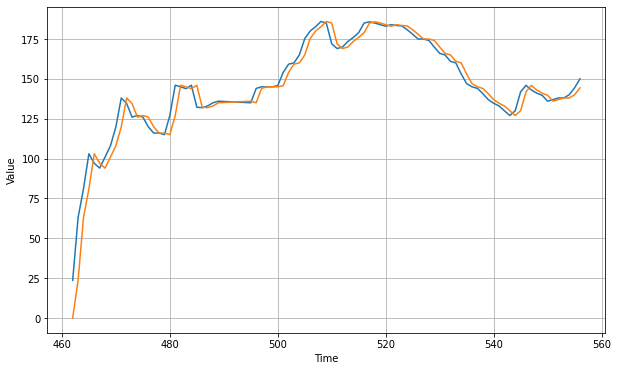

In [93]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[:,0], x_valid[:,0])
plot_series(time_valid[:,0], naive_forecast)

In [94]:
print(tf.keras.metrics.mean_squared_error(x_valid[:,0], naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid[:,0], naive_forecast).numpy())

60.45992490388667
4.709701555555557


# Moving Average


In [ ]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

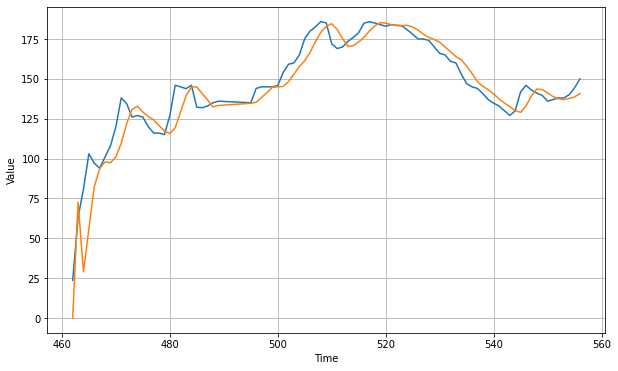

In [ ]:
moving_avg = moving_average_forecast(series, 3)[SPLIT - 3:]
moving_avg[0] = 0
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

127.58348361687446
7.558645592592594


# Deep Learning Solution

In [27]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  # series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size+1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size+1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[1:]))
  return ds.batch(batch_size).prefetch(1)

In [28]:
def model_forecast(model, series, window_size, batch_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(batch_size).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [29]:
def plot_series(time, series, format="-", start=0, end=None, currtype ='exalted'):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [66]:
tf.random.set_seed(51)
np.random.seed(51)
WINDOW = 5
BATCH = 32
SHUFFLE_BUFFER = 100
EPOCHS = 1000
# Number of items

train_set = windowed_dataset(x_train, WINDOW, BATCH, SHUFFLE_BUFFER)
print(train_set)
print(x_train.shape)
INPUT_SIZE = x_train.shape[1]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=[None, INPUT_SIZE]),
                                    tf.keras.layers.LSTM(128, return_sequences=True),
                                    tf.keras.layers.LSTM(128, return_sequences=True),
                                    tf.keras.layers.LSTM(128, return_sequences=True),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(16, activation='relu'),
                                    tf.keras.layers.Dense(INPUT_SIZE),
                                    tf.keras.layers.Lambda(lambda x: x*400)
])

def lrscheduler(epoch, lr):
  scheduler = [400, 750, 1100]
  if epoch in scheduler:
    return lr/3
  else:
    return lr


# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrscheduler)

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(loss = tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])

model.summary()

history = model.fit(train_set, epochs=EPOCHS, callbacks=[lr_schedule])
# history = model.fit(train_set, epochs=EPOCHS)




<PrefetchDataset shapes: ((None, None, 2), (None, None, 2)), types: (tf.float64, tf.float64)>
(510, 2)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, None, 64)          448       
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 128)         98816     
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 128)         131584    
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 128)         131584    
_________________________________________________________________
dense_16 (Dense)             (None, None, 64)          8256      
_________________________________________________________________
dense_17 (Dense)             (None, None, 32)          2080      
_________________

(1e-06, 0.1, 0.0, 0.5)

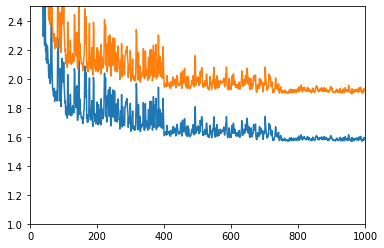

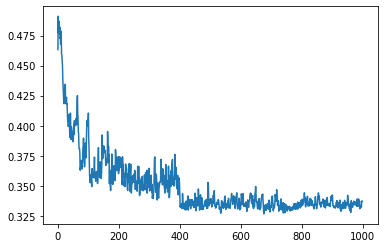

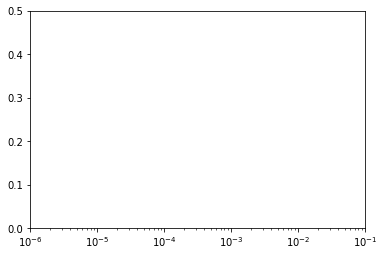

In [80]:
plt.plot(range(EPOCHS), history.history["loss"])
plt.plot(range(EPOCHS), history.history["mae"])
diff = []
for i in range(len(history.history["loss"])):
  diff.append(history.history["mae"][i]-history.history["loss"][i])

plt.axis([0, EPOCHS, 1, 2.5])


plt.figure(2)
plt.plot(range(EPOCHS), diff)

plt.figure(3)
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-1, 0, 0.5])

In [84]:
rnn_forecast = model_forecast(model, stacked_series[...], WINDOW, BATCH)
print(rnn_forecast)
# rnn_forecast = rnn_forecast[SPLIT - WINDOW:-1, -1, 0]
rnn_forecast = rnn_forecast[SPLIT - WINDOW:-1, -1, :]
# rnn_forecast = scalerx.inverse_transform(rnn_forecast)
print(rnn_forecast.shape)
rnn_forecast[0,:] = 0
# print(rnn_forecast)

[[[-7.2903931e-04  1.9756448e-02]
  [-1.8499792e-03  1.7689826e-02]
  [-5.7697296e-03  2.1031635e-02]
  [-6.5874308e-03  1.6814087e-02]
  [ 4.1984022e-04  1.8804090e-02]]

 [[-7.2903931e-04  1.9756448e-02]
  [-1.8499792e-03  1.7689826e-02]
  [-5.7697296e-03  2.1031635e-02]
  [-6.5874308e-03  1.6814087e-02]
  [ 4.1984022e-04  1.8804090e-02]]

 [[-7.2903931e-04  1.9756448e-02]
  [-1.8499792e-03  1.7689826e-02]
  [-5.7697296e-03  2.1031635e-02]
  [-6.5874308e-03  1.6814087e-02]
  [ 4.1984022e-04  1.8804090e-02]]

 ...

 [[ 1.3649454e+02  1.6034155e+01]
  [ 1.3857971e+02  1.6352509e+01]
  [ 1.3916818e+02  1.6875219e+01]
  [ 1.3819868e+02  1.7659872e+01]
  [ 1.4136955e+02  1.7279612e+01]]

 [[ 1.3754089e+02  1.6047338e+01]
  [ 1.3990971e+02  1.6846725e+01]
  [ 1.3835542e+02  1.7209076e+01]
  [ 1.4182248e+02  1.7654032e+01]
  [ 1.4702847e+02  1.7621855e+01]]

 [[ 1.3828712e+02  1.7035753e+01]
  [ 1.3893542e+02  1.7381506e+01]
  [ 1.4160791e+02  1.7154533e+01]
  [ 1.4730765e+02  1.7431536e+01

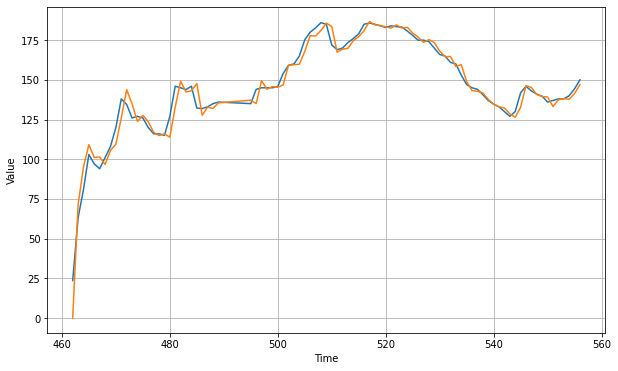

In [85]:
# x_valid_unscaled = scalerx.inverse_transform(x_valid)
x_valid_unscaled = x_valid
plt.figure(figsize=(10, 6))
plot_series(time_valid[:,0:1], x_valid_unscaled[:,0:1])
plot_series(time_valid[:,0:1], rnn_forecast[:,0:1])

In [86]:
START = 0
END = None
print(tf.keras.metrics.mean_squared_error(x_valid_unscaled[START:END,0], rnn_forecast[START:END,0]).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid_unscaled[START:END,0], rnn_forecast[START:END,0]).numpy())

30.856977
3.672449


In [ ]:
model.save(dir+'exaltedorbmodel.h5')

# Printing and testing

In [177]:
pd.set_option('display.max_rows', 1000)

In [178]:
# exdf

,Unnamed: 0,League,Date,Get,Pay,Value,Confidence,Day_Diff
183,2848,Betrayal,2018-12-07,Exalted Orb,Chaos Orb,19.34105,High,0
184,2849,Betrayal,2018-12-08,Exalted Orb,Chaos Orb,41.00000,High,1
185,2850,Betrayal,2018-12-09,Exalted Orb,Chaos Orb,58.00000,High,2
186,2851,Betrayal,2018-12-10,Exalted Orb,Chaos Orb,72.00000,High,3
187,2852,Betrayal,2018-12-11,Exalted Orb,Chaos Orb,74.72035,High,4
188,2853,Betrayal,2018-12-12,Exalted Orb,Chaos Orb,87.00000,High,5
189,2854,Betrayal,2018-12-13,Exalted Orb,Chaos Orb,93.15538,High,6
190,2855,Betrayal,2018-12-14,Exalted Orb,Chaos Orb,97.00000,High,7
191,2856,Betrayal,2018-12-15,Exalted Orb,Chaos Orb,99.00000,High,8
192,2857,Betrayal,2018-12-16,Exalted Orb,Chaos Orb,97.00000,High,9


In [179]:
# divinedf

,Unnamed: 0,League,Date,Get,Pay,Value,Confidence,Day_Diff
184,3026,Betrayal,2018-12-07,Divine Orb,Chaos Orb,4.00000,High,0
185,3027,Betrayal,2018-12-08,Divine Orb,Chaos Orb,4.00000,High,1
186,3028,Betrayal,2018-12-09,Divine Orb,Chaos Orb,5.00000,High,2
187,3029,Betrayal,2018-12-10,Divine Orb,Chaos Orb,7.00000,High,3
188,3030,Betrayal,2018-12-11,Divine Orb,Chaos Orb,7.00000,High,4
189,3031,Betrayal,2018-12-12,Divine Orb,Chaos Orb,7.00000,High,5
190,3032,Betrayal,2018-12-13,Divine Orb,Chaos Orb,8.00000,High,6
191,3033,Betrayal,2018-12-14,Divine Orb,Chaos Orb,8.00000,High,7
192,3034,Betrayal,2018-12-15,Divine Orb,Chaos Orb,8.50000,High,8
193,3035,Betrayal,2018-12-16,Divine Orb,Chaos Orb,8.00000,High,9


In [180]:
divinedf.iloc[89]
divinedf = divinedf.drop([184, 273], axis=0)